__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/bludwig/blob/main/jupyter/40_Train_All_Datasets/_20_Show_Stats.ipynb)__

In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install --quiet blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['in_colab']     = False
environment['dropbox_path'] = /home/me/Dropbox
environment['lib_path']     = /home/me/Dropbox/31_Projekte/01_Python/libs
Start Time: 22:42:47


# Show Stats
* Shows Stats from a given experiment_name
* Needs training results in result directory

In [2]:
# Settings

experiment_name    = 'adult_census_income'   # Which dataset shall be loaded?
#experiment_name    = 'iris'                  # Which dataset shall be loaded?
mode            = 'S'                     # mode: S=show, C=cleanup, 
verbose         = False    
predicts_size   = 100                     # How many predictions should be created?

gdrive_base     = 'drive/MyDrive/Colab'
bgc('Beige')

In [3]:
# Colab? >> Install the latest version of Ludwig
if environment['in_colab']:
  !pip uninstall -y tensorflow --quiet
  !python -m pip install git+https://github.com/ludwig-ai/ludwig.git --quiet 
  !pip install ptitprince --quiet 
  !pip install bludwig --quiet 

In [4]:
# cleanup?
if mode == 'C': 
    try:
        !rm -rf results
        !rm *.meta.json
        !rm *.hdf5    
        !rm *.temp.pickle        
        !rm .lock_preprocessing
    except:
        pass
 

if mode == 'C':
    raise Stop
else:
    bgc('WhiteSmoke')

In [5]:
# import 
import pandas as pd
import pandasklar as pak
grid = pak.grid
import bludwig

## Data

In [6]:
# load_dataset
data_df, dataset_loader = bludwig.load_dataset(experiment_name)


adult_census_income 1.0
Predict whether income exceeds $50K/yr based on census data
https://archive.ics.uci.edu/ml/datasets/adult

output_features: [{'name': 'income', 'type': 'binary'}]


In [7]:
# examine
print(data_df.shape[0], 'records for training, validation and test')
pak.sample(data_df,10)

48840 records for training, validation and test


,income,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,split
0,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
188,>50K,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,0
933,>50K,37,Private,186934,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,44,United-States,0
934,>50K,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,0
1024,<=50K,56,Private,169133,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,0
1245,>50K,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,0
8962,<=50K,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
17095,<=50K,25,?,12285,Some-college,10,Never-married,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,0
40533,<=50K,27,Private,1490400,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,2
41015,<=50K,37,Private,182148,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,39,United-States,2


In [8]:
# analyse_cols
analyse = bludwig.analyse_cols(data_df, dataset_loader)
analyse

,col_name,is_output_feature,feature_type,datatype_short,datatype_identified,mem_usage,nunique,ndups,vmin,vmax,n
0,income,True,binary,string,string,618,2,9998,<=50K,>50K,10000
1,age,False,number,Int8,int,20,71,9929,17.0,90.0,10000
2,workclass,False,category,string,string,662,9,9991,?,Without-pay,10000
3,fnlwgt,False,number,Int32,int,50,8534,1466,12285.0,1490400.0,10000
4,education,False,category,string,string,663,16,9984,10th,Some-college,10000
5,education-num,False,category,Int8,int,20,16,9984,1.0,16.0,10000
6,marital-status,False,category,string,string,710,7,9993,Divorced,Widowed,10000
7,occupation,False,category,string,string,700,14,9986,?,Transport-moving,10000
8,relationship,False,category,string,string,682,6,9994,Husband,Wife,10000
9,race,False,category,string,string,643,5,9995,Amer-Indian-Eskimo,White,10000


## Initialize

In [9]:
# bludwig initialize and load
if mode == 'S':  
    ludwig_job = bludwig.LudwigJob(experiment_name=experiment_name) 
    ludwig_job.load_from_results(experiment_name)
    #print(ludwig_job)

In [10]:
print(ludwig_job)

LudwigJob object
        experiment_name:     adult_census_income
        output_feature_name: income
        train_jobs:          [0, 1]
        model_names:         ['adult_census_income_0', 'adult_census_income_1']
        model_paths:         ['results/adult_census_income_0_run/model', 'results/adult_census_income_1_run/model']        
        output_dirs:         ['results/adult_census_income_0_run', 'results/adult_census_income_1_run']
        model_no:            None   
        cuda:                None             
        


## Evaluate

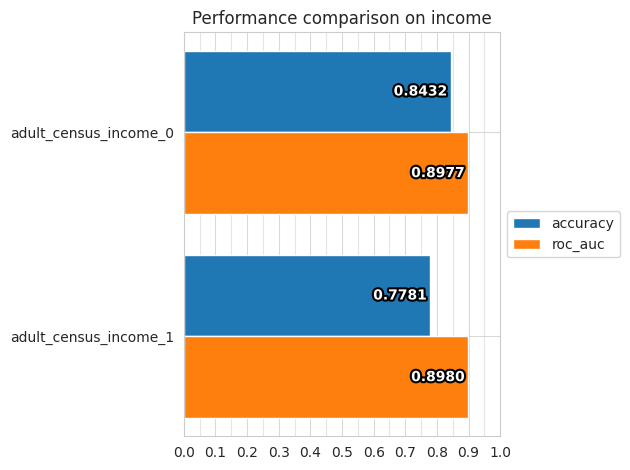

In [11]:
# compare_performance
ludwig_job.compare_performance()

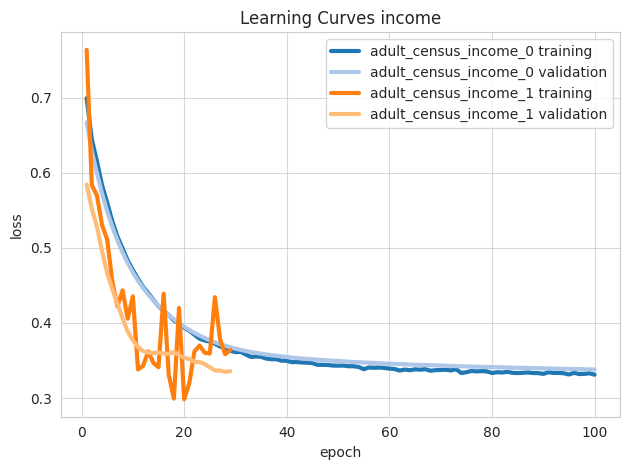

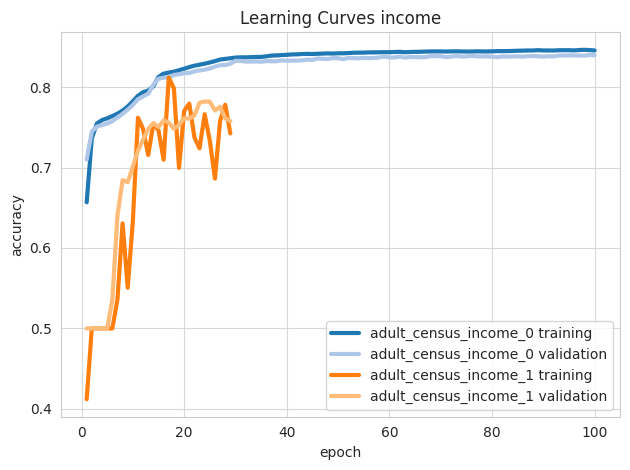

In [12]:
# learning_curves
ludwig_job.learning_curves()

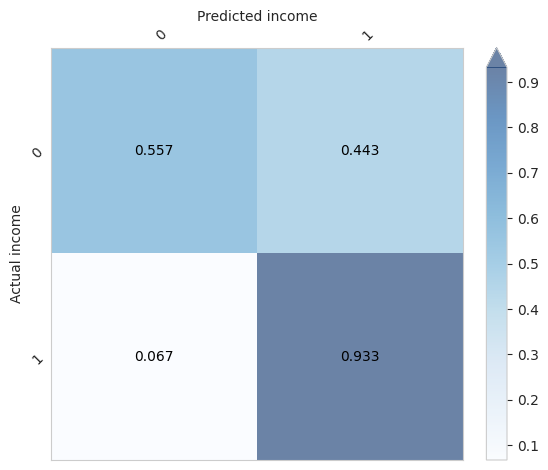

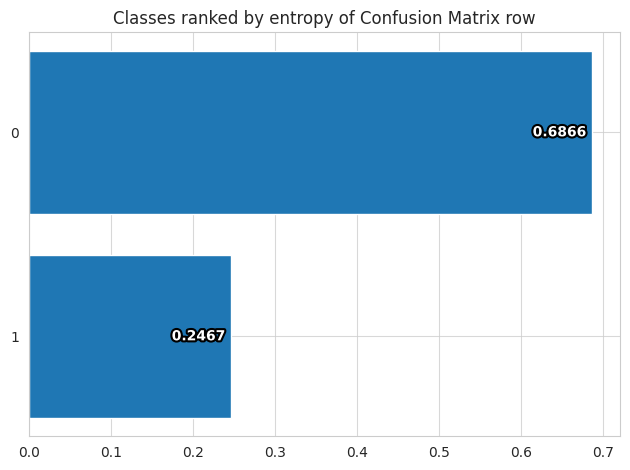

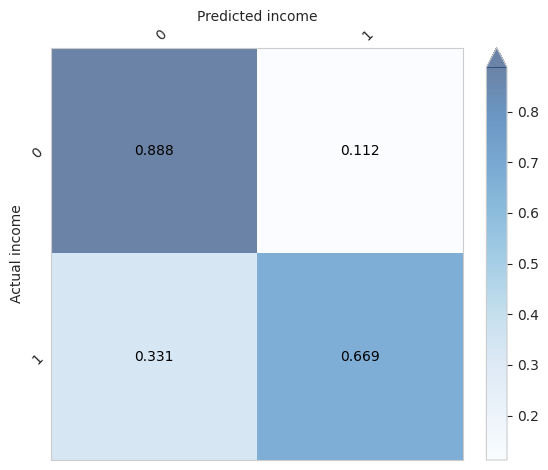

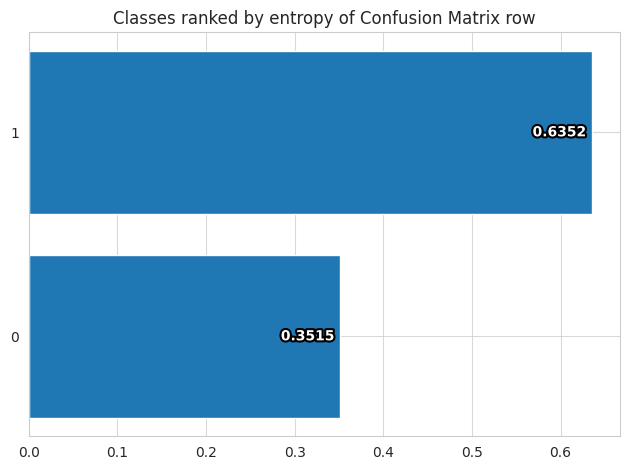

In [13]:
# confusion_matrix
#ludwig_job.load_model(0)
ludwig_job.confusion_matrix()

In [14]:
# roc_curves
ludwig_job.roc_curves()

No roc_curve found


## print_models

In [15]:
# print 
print(ludwig_job)

LudwigJob object
        experiment_name:     adult_census_income
        output_feature_name: income
        train_jobs:          [0, 1]
        model_names:         ['adult_census_income_0', 'adult_census_income_1']
        model_paths:         ['results/adult_census_income_0_run/model', 'results/adult_census_income_1_run/model']        
        output_dirs:         ['results/adult_census_income_0_run', 'results/adult_census_income_1_run']
        model_no:            0   
        cuda:                True             
        


In [16]:
ludwig_job.print_models()

### adult_census_income_0 ###
Layer (type:depth-idx)                             Input Shape               Output Shape              Param #                   Trainable
ECD                                                [2]                       [2]                       --                        True
├─LudwigFeatureDict: 1-1                           --                        --                        --                        True
│    └─ModuleDict: 2-1                             --                        --                        --                        True
│    │    └─NumberInputFeature: 3-1                [2]                       [2, 1]                    --                        --
│    │    │    └─PassthroughEncoder: 4-1           [2, 1]                    [2, 1]                    --                        --
│    │    └─CategoryInputFeature: 3-2              [2, 1]                    [2, 9]                    --                        True
│    │    │    └─CategoricalEmb

## Predict

In [21]:
# load_model
predict_model = ludwig_job.train_jobs[-1]
print('predict_model:',predict_model)
ludwig_job.load_model(predict_model)

# data
data_sample = pak.sample(data_df, predicts_size)

# predict
data_sample = ludwig_job.predict(data_sample)
data_sample

predict_model: 1


,income,income_pred,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,...,sex,capital-gain,capital-loss,hours-per-week,native-country,split,income_prob,income_prob,income_prob_<=50K,income_prob_>50K
0,<=50K,>50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,...,Male,0,0,13,United-States,0,"[0.29728376865386963, 0.7027162313461304]",0.702716,0.297284,0.702716
3,<=50K,>50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,...,Female,0,0,40,Cuba,0,"[0.3828846216201782, 0.617115318775177]",0.617115,0.382885,0.617115
11,<=50K,<=50K,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,...,Female,0,0,30,United-States,0,"[0.9876763820648193, 0.012323640286922455]",0.987676,0.987676,0.012324
13,>50K,<=50K,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,...,Male,0,0,40,?,0,"[0.8065140247344971, 0.19348594546318054]",0.806514,0.806514,0.193486
14,<=50K,<=50K,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,...,Male,0,0,45,Mexico,0,"[0.9304035902023315, 0.06959637254476547]",0.930404,0.930404,0.069596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45593,>50K,>50K,69,Self-emp-not-inc,187332,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,...,Male,20051,0,45,United-States,2,"[0.05307492986321449, 0.9469250440597534]",0.946925,0.053075,0.946925
45895,<=50K,<=50K,58,Private,128258,HS-grad,9,Divorced,Sales,Not-in-family,...,Female,0,0,24,United-States,2,"[0.9865099787712097, 0.013489998877048492]",0.986510,0.986510,0.013490
47854,<=50K,<=50K,42,Self-emp-not-inc,210013,Some-college,10,Married-civ-spouse,Craft-repair,Husband,...,Male,0,0,45,United-States,2,"[0.5640255212783813, 0.43597447872161865]",0.564026,0.564026,0.435974
47997,<=50K,<=50K,28,Private,336951,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,...,Male,0,0,40,United-States,2,"[0.7870173454284668, 0.21298262476921082]",0.787017,0.787017,0.212983


## Colab: Copy back

In [22]:
if not environment['in_colab']:
    raise Stop

Stop Time:  22:44:23
Elapsed:    1 min, 35 secs


In [ ]:
# mount
if environment['in_colab']:
    from google.colab import drive
    drive.mount('/content/drive')  

In [ ]:
# mount
if environment['in_colab']:
    from google.colab import drive
    drive.mount('/content/drive')  

In [ ]:
if environment['in_colab']:
    !ls

In [ ]:
if environment['in_colab']:
    !ls results

In [ ]:
# results: copy to GDrive
if environment['in_colab']:
  results_path = gdrive_base + '/results'
  !cp -a results $results_path 
  !cp train_log*.csv $gdrive_base 

In [ ]:
if environment['in_colab']:
    print('Copy back manually:')
    print('1) This ipynb-File, if changed')
    print('2) results directory')
    print('3) train_log file')    
else:
    print('finished')

In [ ]:
raise Stop